# Libraries and pre-processing

In [ ]:
import numpy as np
import pandas as pd
import pywt
import yfinance as yf
import copy
import warnings
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Concatenate
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D 
from tensorflow.keras.layers import Dense,LSTM,Dropout,Input,BatchNormalization,Conv1D, MaxPooling1D, Flatten, Lambda, Subtract, Add, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.8 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install NBEATS

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import datetime
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from time import time
from NBEATS import NeuralBeats
import torch

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


**DATA DOWNLOAD** *italicized text*

In [ ]:
WMT = yf.download('WMT', 
                      start='2016-01-01', 
                      end='2021-06-01', 
                      progress=False,
)

In [ ]:
GOOG = yf.download('GOOG', 
                      start='2010-01-01', 
                      end='2021-06-01', 
                      progress=False,
)

In [ ]:
MSFT = yf.download('MSFT', 
                      start='2010-01-01', 
                      end='2021-06-01', 
                      progress=False,
)

In [ ]:
df1=pd.DataFrame(WMT)
df2=pd.DataFrame(GOOG)
df3=pd.DataFrame(MSFT)

In [ ]:
df1=df1['Close']
df2=df2['Close']
df3=df3['Close']

In [ ]:
df1=df1.to_frame()
df3=df3.to_frame()
df2=df2.to_frame()

In [ ]:
df1.rename(columns={'Close':'Walmart'},inplace=True)
df2.rename(columns={'Close':'Alphabet'},inplace=True)
df3.rename(columns={'Close':'Microsoft'},inplace=True)

In [ ]:
df=pd.concat([df1,df2,df3],axis=1)

In [ ]:
stockList = ["Microsoft"]

In [ ]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col], dataframe.loc[:,col]

In [ ]:
df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"],df_new[i]["Complete"] = split(df, "2020-05-01", i)

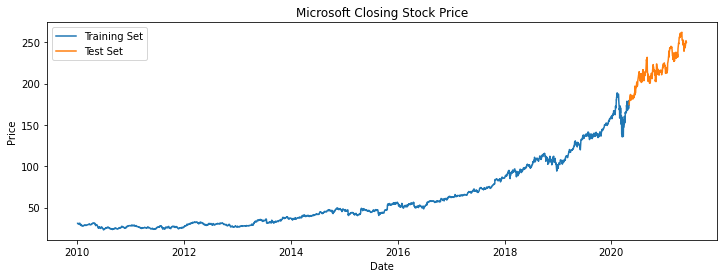

In [ ]:
for i in stockList:
    plt.figure(figsize=(12,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    # plt.plot(df_new[i]["Complete"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

# NBEATS

**NBEATS**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
df_new['Walmart']["Test"]

Date
2020-05-01    122.919998
2020-05-04    123.699997
2020-05-05    124.730003
2020-05-06    123.300003
2020-05-07    121.889999
                 ...    
2021-05-24    141.759995
2021-05-25    142.339996
2021-05-26    142.169998
2021-05-27    141.690002
2021-05-28    142.029999
Name: Walmart, Length: 272, dtype: float64

In [ ]:
models={}
for i in stockList:
  # print(i)
  if i=='Microsoft':
    data=df_new[i]["Train"]
    data=np.array(data)
    data=data.reshape(-1,1)
    models[i]=NeuralBeats(data=data,forecast_length=1,backcast_length=20,mode='cpu',stack=[1,3],thetas_dims=[8,4],nb_blocks_per_stack=3,hidden_layer_units=256)
    models[i].fit(epoch=10,optimiser=torch.optim.AdamW(models[i].parameters, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.01, amsgrad=False),plot=False, verbose=True)

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139773887168208
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139773906733840
     | -- GenericBlock(units=256, thetas_dim=8, backcast_length=20, forecast_length=1, share_thetas=False) at @139773887165776
| --  Stack Seasonality (#1) (share_weights_in_stack=False)
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139773887166544
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139773887165392
     | -- SeasonalityBlock(units=256, thetas_dim=1, backcast_length=20, forecast_length=1, share_thetas=True) at @139773878150864
grad_step = 000030, tr_loss = 0.002065, te_loss = 0.681807
grad_step = 000060, tr_loss = 0.000097, te_l

In [ ]:
forecast={}
for i in stockList:
  input_predict=[]
  output_predict=[]
  datta=np.array(df_new[i]["Complete"])
  print(data.shape)
  data_test=np.array(df_new[i]["Test"])
  data_train=np.array(df_new[i]["Train"])
  for k in range(len(data_test)):
    x=[]
    output_predict.append(data_test[k])
    for j in range(20):
      x.append(datta[len(data_train)-20+k+j])
    input_predict.append(x)
    # x=np.array(x)
    # print(x.shape)
  input_predict=np.array(input_predict)
  output_predict=np.array(output_predict)
  forecast[i]=[]
  for j in range(len(output_predict)):
    # print(input_predict[j].shape)
    x=models[i].predict(predict_data=input_predict[j])
    forecast[i].append(x)
  forecast[i]=np.array(forecast[i])
  forecast[i]=forecast[i].reshape(-1,1)

(2600, 1)


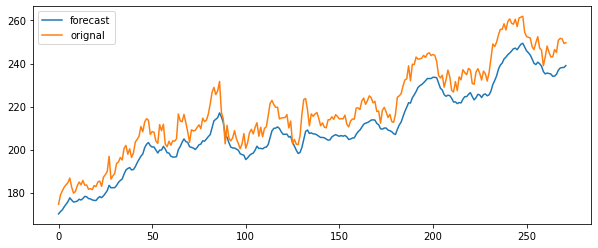

In [ ]:
for i in stockList:
  x=df_new[i]["Test"]
  x=np.array(x)
  x=x.reshape(-1,1)
  plt.figure(figsize=(10,4))
  plt.plot(forecast[i],label='forecast')
  plt.plot(x,label='orignal')
  plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x,forecast['Microsoft'], squared=False)

9.791604548329909

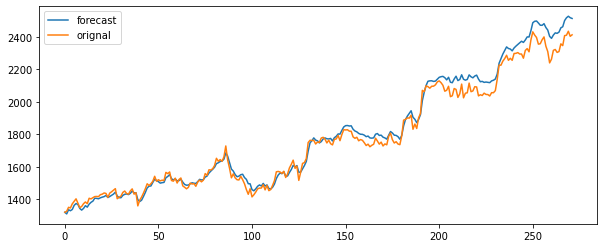

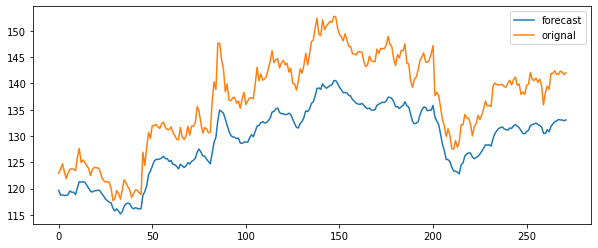

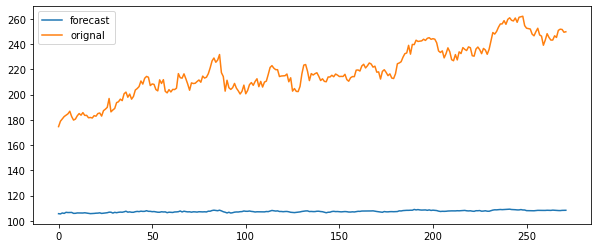

In [ ]:
for i in stockList:
  x=df_new[i]["Test"]
  x=np.array(x)
  x=x.reshape(-1,1)
  plt.figure(figsize=(10,4))
  plt.plot(forecast[i],label='forecast')
  plt.plot(x,label='orignal')
  plt.legend()

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()


In [ ]:
loss={}
for i in stockList:
  loss[i]=mape(df_new[i]['Test'],forecast[i])
  print(loss[i])
  print(i)

tf.Tensor(10.911941, shape=(), dtype=float32)
Microsoft


# LSTM

In [ ]:
from sklearn.preprocessing import RobustScaler  

In [ ]:
df_lstm=df

In [ ]:
f_transformer={}
for i in stockList:
  f_transformer[i]=RobustScaler()
  f_transformer[i]=f_transformer[i].fit(df_lstm[i].values.reshape(-1,1))
  df_lstm[i]=f_transformer[i].transform(df_lstm[i].values.reshape(-1,1))    

In [ ]:
df_lstm.head()

,Walmart,Alphabet,Microsoft
Date,,,
2016-01-04,-0.806155,-0.905286,-0.572725
2016-01-05,-0.772623,-0.903444,-0.569924
2016-01-06,-0.758153,-0.900856,-0.581130
2016-01-07,-0.724162,-0.943734,-0.602196
2016-01-08,-0.758383,-0.973397,-0.600403


In [ ]:
df_new_lstm = {}
for i in stockList:
    df_new_lstm[i] = {}
    df_new_lstm[i]["Train"], df_new_lstm[i]["Test"],df_new_lstm[i]["Complete"] = split(df_lstm, "2021-01-01", i)

In [ ]:
len(df_new_lstm["Alphabet"]["Train"])

1259

In [ ]:
def create_dataset(X,y,z,time_steps=1):
  Xs,ys=[],[]
  if z:
    for i in range(len(X)-time_steps):
      v=X.iloc[i:(i+time_steps)].to_numpy()
      Xs.append(v)
      ys.append(y.iloc[(i+time_steps)])
  else:
    for i in range(len(y)-len(X)):
      t=y.iloc[len(X)+i]
      ys.append(t)
      v=y.iloc[(len(X)-time_steps+i):(len(X)+i)].to_numpy()
      # print(v.shape)
      Xs.append(v)
      # for j in range(time_steps):
      #   v=y.iloc[len(X)-time_steps+j+i]
      #   Xs.append(v)
        
  return np.array(Xs),np.array(ys)

In [ ]:
X={}
y={}
for i in stockList:
  X[i]={}
  y[i]={}
  time_steps=30
  X[i]["Train"],y[i]["Train"]=create_dataset(df_new_lstm[i]["Train"], df_new_lstm[i]["Train"],True,time_steps=time_steps)
  X[i]["Test"],y[i]["Test"]=create_dataset(df_new_lstm[i]["Train"], df_new_lstm[i]["Complete"],False,time_steps=time_steps)

In [ ]:
X["Walmart"]["Train"].shape

(1229, 30)

In [ ]:
for i in stockList:
  X[i]["Train"]=X[i]["Train"].reshape(X[i]["Train"].shape[0],X[i]["Train"].shape[1],1)
  y[i]["Test"]=y[i]["Test"].reshape(y[i]["Test"].shape[0],1)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
models={}
for i in stockList:
  models[i]=keras.Sequential()
  models[i].add(keras.layers.LSTM(units=128,return_sequences=True,input_shape=(X[i]["Train"].shape[1],X[i]["Train"].shape[2])))
  models[i].add(keras.layers.LSTM(units=64,return_sequences=False))
  models[i].add(keras.layers.Dropout(rate=0.2))
  models[i].add(keras.layers.Dense(units=1))

In [ ]:
for i in stockList:
  models[i].compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history={}
for i in stockList:
  history[i]=models[i].fit(X[i]["Train"],y[i]["Train"],epochs=50,batch_size=16,shuffle=False)

Epoch 1/50
77/77 [==============================] - 7s 39ms/step - loss: 0.0473
Epoch 2/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0170
Epoch 3/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0156
Epoch 4/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0126
Epoch 5/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0136
Epoch 6/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0097
Epoch 7/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0099
Epoch 8/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0090
Epoch 9/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0115
Epoch 10/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0083
Epoch 11/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0080
Epoch 12/50
77/77 [==============================] - 3s 38ms/step - loss: 0.0078
Epoch 13/50
77/77 [==================

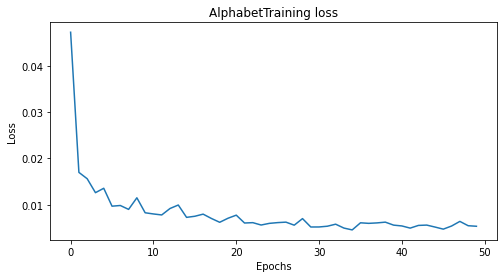

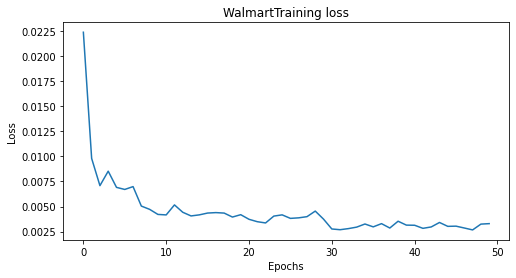

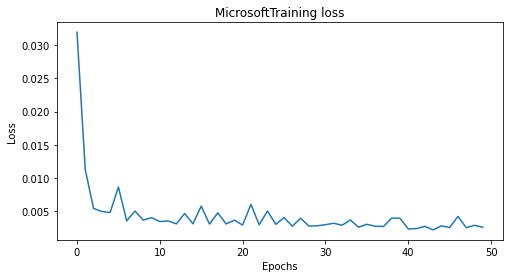

In [ ]:
for i in stockList:
  plt.figure(figsize=(8,4))
  plt.plot(history[i].history['loss'])
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.title(i + "Training loss")

In [ ]:
train_pred,test_pred={},{}
y_pred_test,train_predict={},{}
y_test={}
for i in stockList:
  train_pred[i]=models[i].predict(X[i]["Train"])
  test_pred[i]=models[i].predict(X[i]["Test"])
  y_pred_test[i]=f_transformer[i].inverse_transform(test_pred[i])
  train_predict[i]=f_transformer[i].inverse_transform(train_pred[i])
  y_test[i]=f_transformer[i].inverse_transform(y[i]["Test"])

In [ ]:
y_test["Walmart"].dtype

dtype('float64')

In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [ ]:
for i in stockList:
  print(mape(y_pred_test[i],y_test[i]))


tf.Tensor(1.4542522430419922, shape=(), dtype=float64)
tf.Tensor(2.1749985218048096, shape=(), dtype=float64)
tf.Tensor(1.5586804151535034, shape=(), dtype=float64)


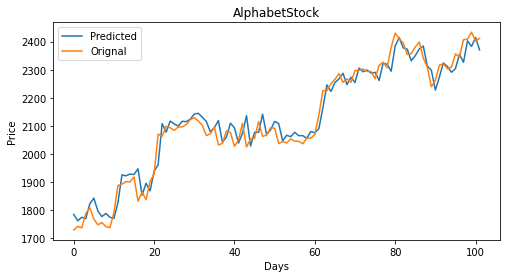

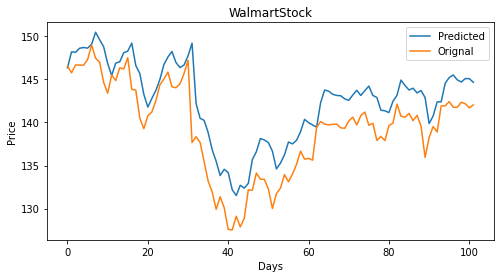

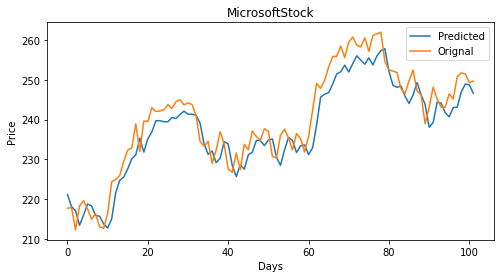

In [ ]:
for i in stockList:
  plt.figure(figsize=(8,4))
  plt.plot(y_pred_test[i],label='Predicted')
  plt.plot(y_test[i],label='Orignal')
  plt.ylabel("Price")
  plt.xlabel("Days")
  plt.title(i + "Stock")
  plt.legend()

# ARIMA AND SARIMA

In [ ]:
df_diff=df

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA,ARMA

In [ ]:
for i in stockList:
  df_diff[i]=df_diff[i].pct_change().dropna()
  # df_diff[i]=df_diff[i][1:]

In [ ]:
df=df.iloc[1:,:]

In [ ]:
df.head()

,Walmart,Alphabet,Microsoft
Date,,,
2010-01-05,NaN,-0.004404,0.000323
2010-01-06,NaN,-0.025209,-0.006137
2010-01-07,NaN,-0.023280,-0.010400
2010-01-08,NaN,0.013331,0.006897
2010-01-11,NaN,-0.001512,-0.012720


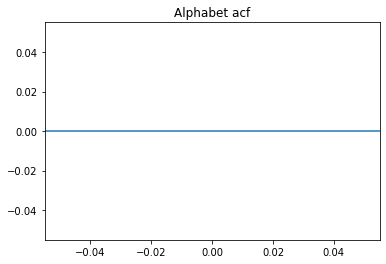

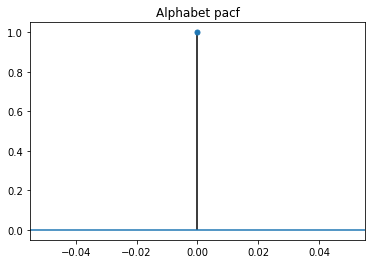

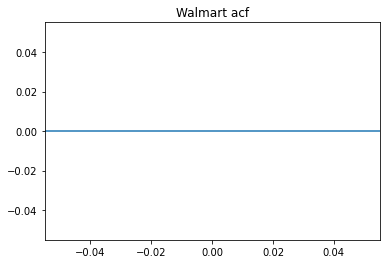

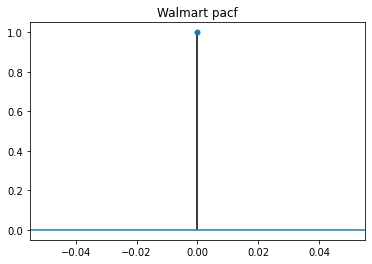

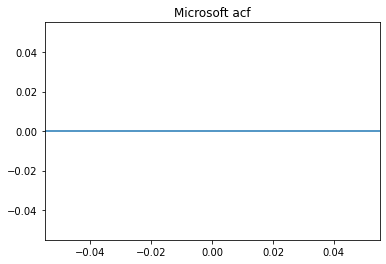

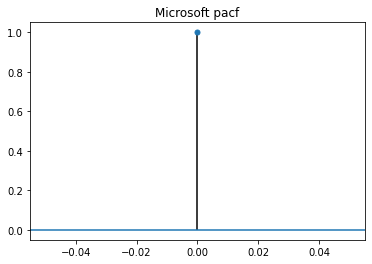

In [ ]:
for i in stockList:
  x=np.array(df_diff[i])
  plot_acf(x)
  plt.title(i+" acf")
  plt.show()
  plot_pacf(x)
  plt.title(i+' pacf')
  plt.show()

In [ ]:
df_s = {}
for i in stockList:
    df_s[i] = {}
    df_s[i]["Train"], df_s[i]["Test"],df_s[i]["Complete"] = split(df, "2021-01-01", i)

In [ ]:
history={}
predictions={}
models_stat={}
model_fit={}
for i in stockList:
  history[i]=[x for x in df_s[i]["Train"]]
  predictions[i]=[]
  for t in range(len(df_s[i]["Test"])):
    models_stat[i]=ARIMA(history[i],order=(0,1,1))
    model_fit[i]=models_stat[i].fit()
    pred=model_fit[i].forecast()
    yhat=pred[0]
    predictions[i].append(yhat)
    obs=df_s[i]["Test"][t]
    history[i].append(obs)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


LinAlgError: ignored

In [ ]:
for i in stockList:
  print(model_fit[i].summary())

In [ ]:
print(df_s["Walmart"]["Test"])

In [ ]:
for i in stockList:
  predictions[i]=pd.Series(predictions[i],index=df_s[i]["Test"].index)

In [ ]:
predictions["Walmart"].head()

In [ ]:
for i in stockList:
  plt.figure(figsize=(8,4))
  plt.plot(predictions[i],label='Predicted')
  plt.plot(df_s[i]["Test"],label='Orignal')
  plt.title(i+" Stock")
  plt.legend()

In [ ]:
for i in stockList:
  predictions[i]=np.array(predictions[i],dtype=np.float)
  df_s[i]["Test"]=np.array(df_s[i]["Test"],dtype=np.float)
  # print(df_s[i]["Test"].shape)
  print(mape(predictions[i],df_s[i]["Test"]))

tf.Tensor(1.2784394025802612, shape=(), dtype=float64)
tf.Tensor(0.8612291812896729, shape=(), dtype=float64)
tf.Tensor(1.200595736503601, shape=(), dtype=float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
